# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
import pandas as pd
import requests
import numpy as np

import api_keys
from citipy import citipy

## Generate Cities List

In [36]:
city_df = pd.DataFrame()
city_df['city'] = ''

lat_range = np.random.uniform(low=-90.000, high=90.000, size=1500)
long_range = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_range

for index in range(len(lat_range)):
    city_df.loc[index, 'city'] = citipy.nearest_city(lat_range[index],long_range[index]).city_name



city_df = city_df.drop_duplicates('city',keep='last').reset_index(drop=True)

city_df['Lat'] = ''
city_df['Long'] = ''
city_df['Max Temp']	= ''
city_df['Humidity']	=''
city_df['Cloudiness'] =''
city_df['Wind Speed']=''
city_df['Date']=''

city_df

,city,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,laerdalsoyri,,,,,,,
1,ghanzi,,,,,,,
2,namwala,,,,,,,
3,namibe,,,,,,,
4,coahuayana,,,,,,,
...,...,...,...,...,...,...,...,...
612,rikitea,,,,,,,
613,albany,,,,,,,
614,zomba,,,,,,,
615,saleaula,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
test_city = city_df['city'].iloc[0]
def query_url(city):
    weather_key = api_keys.weather_api_key
    url = 'http://api.openweathermap.org/data/2.5/weather?'
    units = 'imperial'
    query_url = f'{url}appid={weather_key}&units={units}&q={city}'

    return query_url

In [5]:
def generate_df(df,index,response):
    df.loc[index, 'Lat'] = response['coord']['lat']
    df.loc[index, 'Long'] = response['coord']['lon']
    df.loc[index,'Max Temp']= response['main']['temp_max']
    df.loc[index, 'Humidity'] = response['main']['humidity']
    df.loc[index, 'Cloudiness'] = response['clouds']['all']
    df.loc[index, 'Wind Speed'] = response['wind']['speed']
    df.loc[index, 'Date'] = response['dt']

set_index = 0
set_num = 1
for index, row in city_df.iterrows():
    city_name = row['city']
    query = query_url(city_name)
    try:
        response = requests.get(query).json()
        generate_df(city_df,index,response)
        if set_index == 50:
            set_num += 1
            set_index = 0
        else:
            set_index += 1
        print(f'Processing Record {set_index} of Set {set_num} : {city_name}')
    except(KeyError,IndexError):
        city_df.drop([index])
        print('City not Found. Skipping...')

Processing Record 1 of Set 1 : lisala
Processing Record 2 of Set 1 : gweta
Processing Record 3 of Set 1 : arrifes
Processing Record 4 of Set 1 : rizhao
Processing Record 5 of Set 1 : palu
Processing Record 6 of Set 1 : ugoofaaru
Processing Record 7 of Set 1 : karlskrona
City not Found. Skipping...
Processing Record 8 of Set 1 : putyatino
Processing Record 9 of Set 1 : da nang
Processing Record 10 of Set 1 : lagunas
Processing Record 11 of Set 1 : novaya zaimka
Processing Record 12 of Set 1 : vega de alatorre
Processing Record 13 of Set 1 : gao
Processing Record 14 of Set 1 : mount isa
Processing Record 15 of Set 1 : lac du bonnet
Processing Record 16 of Set 1 : ust-kut
Processing Record 17 of Set 1 : peniche
Processing Record 18 of Set 1 : alta floresta
Processing Record 19 of Set 1 : rauma
Processing Record 20 of Set 1 : luderitz
Processing Record 21 of Set 1 : san policarpo
Processing Record 22 of Set 1 : high level
Processing Record 23 of Set 1 : coruripe
Processing Record 24 of Set

In [26]:
# create checkpoint with dataframe
df = city_df.copy()

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
df.replace('', np.nan, inplace=True)

In [28]:
df_drop = df.dropna()

In [29]:
df_reset = df_drop.reset_index(drop=True)

In [30]:
df = df_reset.copy()
df_reset.to_csv('Data/Cities_info.csv')

In [31]:
df.describe()

,index,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,304.820423,19.429356,18.824855,70.002465,70.948944,51.665493,7.978715,1.627347e+09
std,177.663791,33.284623,92.031359,13.470756,19.733834,39.900150,5.657243,8.622578e+01
min,0.000000,-54.800000,-175.200000,33.460000,8.000000,0.000000,0.000000,1.627346e+09
25%,150.750000,-9.818900,-58.625075,60.390000,60.000000,9.000000,3.760000,1.627346e+09
50%,305.500000,22.351100,21.532450,71.360000,75.000000,49.500000,6.555000,1.627347e+09
75%,457.250000,47.692500,100.847500,80.287500,86.000000,96.000000,10.925000,1.627347e+09
max,614.000000,78.218600,179.316700,102.810000,100.000000,100.000000,32.280000,1.627347e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [32]:
df_humidity = df.loc[df['Humidity'] < 100]

In [33]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = df_humidity 

In [35]:
clean_city_data
clean_city_data.to_csv('Data/Cities_clean.csv')


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [4]:
df = pd.read_csv('Data/cities_clean.csv')
df.head()

,Unnamed: 0,index,city,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,0,0,lisala,2.1500,21.5167,70.16,95.0,100.0,2.26,1.627346e+09
1,1,1,gweta,-20.1833,25.2333,45.88,70.0,0.0,9.75,1.627346e+09
2,2,2,arrifes,37.7667,-25.7000,68.25,88.0,75.0,8.05,1.627346e+09
3,3,3,rizhao,35.4275,119.4553,80.55,88.0,99.0,18.75,1.627346e+09
4,4,4,palu,-0.8917,119.8707,84.33,70.0,100.0,1.05,1.627346e+09


In [5]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Temperature vs Latitude')

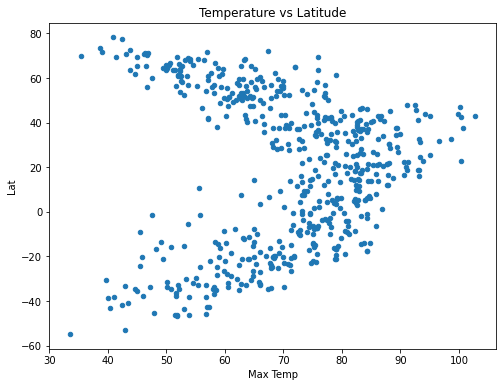

In [6]:
df.plot.scatter(x = 'Max Temp', y = 'Lat', figsize = (8,6))
plt.title('Temperature vs Latitude')

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Humidity vs Latitude')

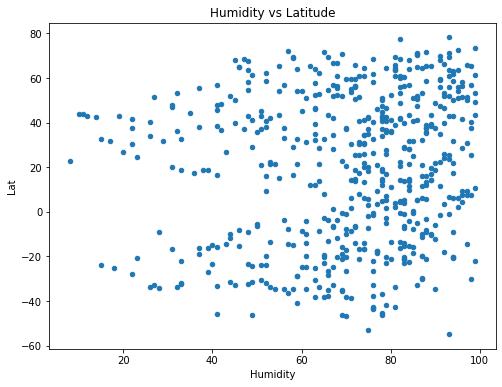

In [7]:
df.plot.scatter(x = 'Humidity', y = 'Lat', figsize = (8,6))
plt.title('Humidity vs Latitude')

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Cloudiness vs Latitude')

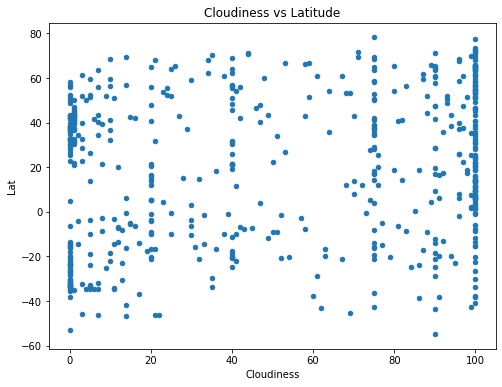

In [8]:
df.plot.scatter(x = 'Cloudiness', y = 'Lat', figsize = (8,6))
plt.title('Cloudiness vs Latitude')

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'WInd Speed vs Latitude')

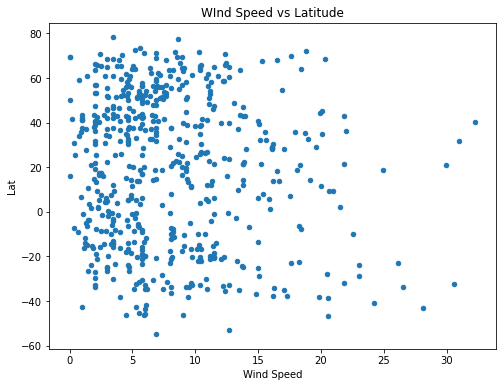

In [9]:
df.plot.scatter(x = 'Wind Speed', y = 'Lat', figsize = (8,6))
plt.title('WInd Speed vs Latitude')

## Linear Regression

In [10]:
from scipy.stats import linregress

# Define the hemispheres

north_hem_df = df.loc[df['Lat'] > 0 ]
south_hem_df = df.loc[df['Lat'] < 0 ]

def linear_regression_hemisphere(hemisphere,x_column,y_column):
    hemisphere.plot.scatter(x=x_column, y = y_column, figsize = (8,6))
    x_value = hemisphere[x_column]
    y_value = hemisphere[y_column]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {slope.round(2)} * x_value + {intercept.round(2)}"
    print(line_eq)
    plt.plot(x_value, regress_value, 'r', color = 'blue')
    plt.title('Regression: temperature vs. latitude (north hemisphere)')
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.45 * x_value + 90.03


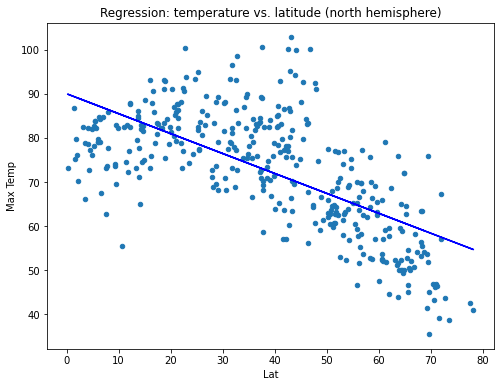

In [11]:
linear_regression_hemisphere(north_hem_df, 'Lat', 'Max Temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.63 * x_value + 78.49


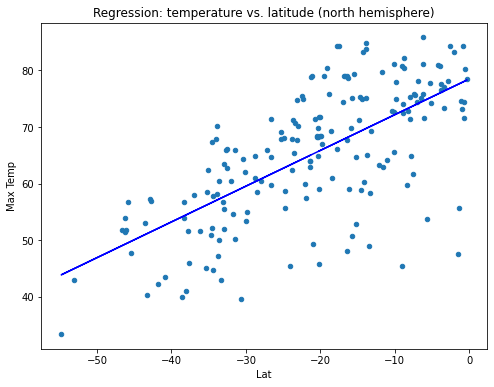

In [12]:
linear_regression_hemisphere(south_hem_df, 'Lat', 'Max Temp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.03 * x_value + 73.68


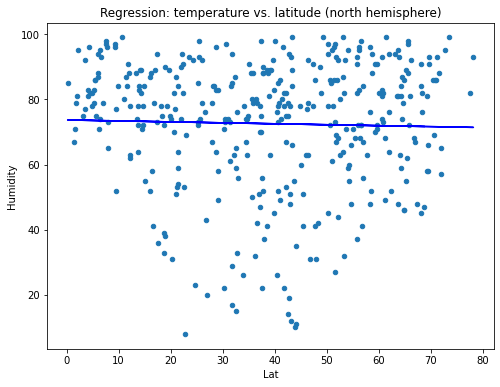

In [13]:
linear_regression_hemisphere(north_hem_df, 'Lat', 'Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.26 * x_value + 72.31


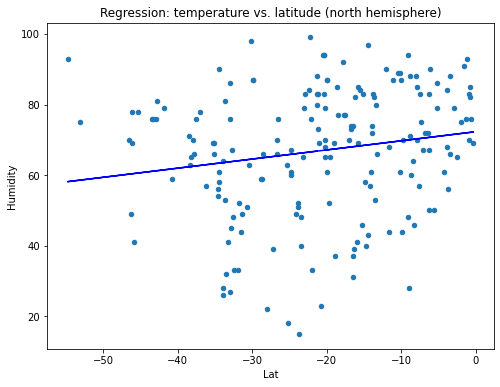

In [14]:
linear_regression_hemisphere(south_hem_df, 'Lat', 'Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.1 * x_value + 62.54


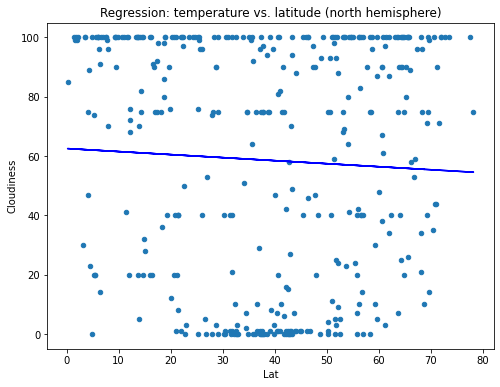

In [15]:
linear_regression_hemisphere(north_hem_df, 'Lat', 'Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.3 * x_value + 44.27


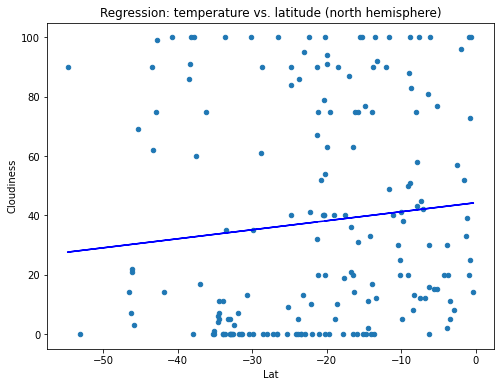

In [16]:
linear_regression_hemisphere(south_hem_df, 'Lat', 'Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.02 * x_value + 8.77


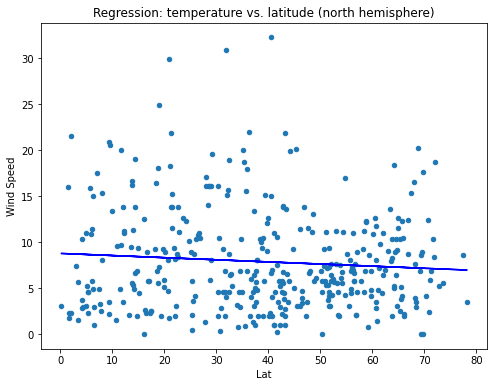

In [17]:
linear_regression_hemisphere(north_hem_df, 'Lat', 'Wind Speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.02 * x_value + 8.77


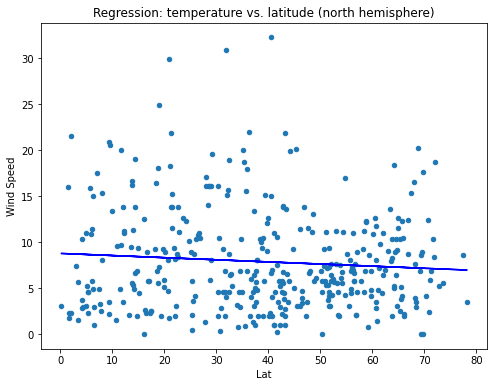

In [18]:
linear_regression_hemisphere(north_hem_df, 'Lat', 'Wind Speed')